# Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import os
import numpy as np
import pandas as pd


# Define DataFrame Creation Functions

In [2]:
def create_dataframes(data_path):
    '''
    DESC
    ---
    Creates the dataframes to be used for visualizing data
    ---
    INPUTS 
    ---
    datapath: a data path which contains 2 folders, one labeled "tsv_good" with
    all good tsv files and one labeled tsv_bad with all bad tsv files
    ---

    RETURN
    ---
    good_sequences_df: a dataframe of all sequences of data
    bad_sequences_df: a dataframe of all sequences of bad

    good_lengths_df: a dataframe of lengths of each sequence for good data
    bad_lengths: a dataframe of lengths of each sequence for bad data
    ---
    '''
    
    # get the file paths for all the good and bad tsv files
    good_dir = data_path + "/tsv_good/"
    bad_dir = data_path + "/tsv_bad/"

    good_files = os.listdir(good_dir)
    bad_files = os.listdir(bad_dir)
    
    good_sequences = []
    bad_sequences = []

    good_lengths = []
    bad_lengths = []

    for good_file in good_files:
        file_path = good_dir + good_file
        # skip files which are invalid
        if not file_path.endswith('.tsv'):
            continue
        sequence = pd.read_csv(file_path, delimiter='\t', index_col='Unnamed: 0')
        good_sequences.append(sequence)

        # create a list of lengths and sequence labels
        good_lengths.append({'length' : len(sequence)})

    for bad_file in bad_files:
        file_path = bad_dir + bad_file
        # skip files which are invalid
        if not file_path.endswith('.tsv'):
                continue
        sequence = pd.read_csv(file_path, delimiter='\t', index_col='Unnamed: 0')
        bad_sequences.append(sequence)

        # create a list of lengths and sequence labels
        bad_lengths.append({'length' : len(sequence)})


    good_sequences_df = pd.concat(good_sequences, axis=0, ignore_index=True)
    bad_sequences_df = pd.concat(bad_sequences, axis=0, ignore_index=True)
    good_lengths_df = pd.DataFrame(good_lengths)
    bad_lengths_df = pd.DataFrame(bad_lengths)

    return good_sequences_df, bad_sequences_df, good_lengths_df, bad_lengths_df

# Create DataFrames

In [3]:
good_sequences, bad_sequences, good_lengths, bad_lengths = \
    create_dataframes('/Users/CiaraFigliuolo/Documents/CMU/11785_DL/Project/Sorted')

# Plot Histograms and Print Statistics for Lengths

Min sequence length in good data is 1002
Max sequence length in good data is 120023
Mean sequence length in good data is 3382.8960993528076
Median sequence length in good data is 2232.0


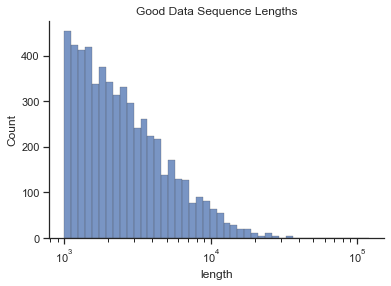

In [4]:
sns.set_theme(style="ticks")
sns.histplot(
    good_lengths,
    x="length",
    multiple="dodge",
    stat="count",
    edgecolor=".3",
    linewidth=.25,
    log_scale=True,
    shrink=True,
).set(title="Good Data Sequence Lengths")
sns.despine()

good_lengths_min = good_lengths['length'].min()
good_lengths_max = good_lengths['length'].max()
good_lengths_mean = good_lengths['length'].mean()
good_lengths_median = good_lengths['length'].median()
print(f"Min sequence length in good data is {good_lengths_min}")
print(f"Max sequence length in good data is {good_lengths_max}")
print(f"Mean sequence length in good data is {good_lengths_mean}")
print(f"Median sequence length in good data is {good_lengths_median}")

Min sequence length in bad data is 1002
Max sequence length in bad data is 44906
Mean sequence length in bad data is 2948.5934182590236
Median sequence length in bad data is 1785.0


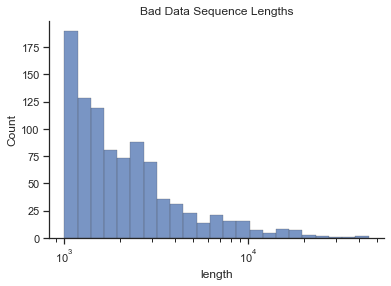

In [5]:
sns.set_theme(style="ticks")
sns.histplot(
    bad_lengths,
    x="length",
    multiple="dodge",
    stat="count",
    edgecolor=".3",
    linewidth=.25,
    log_scale=True,
).set(title="Bad Data Sequence Lengths")
sns.despine()

bad_lengths_min = bad_lengths['length'].min()
bad_lengths_max = bad_lengths['length'].max()
bad_lengths_mean = bad_lengths['length'].mean()
bad_lengths_median = bad_lengths['length'].median()
print(f"Min sequence length in bad data is {bad_lengths_min}")
print(f"Max sequence length in bad data is {bad_lengths_max}")
print(f"Mean sequence length in bad data is {bad_lengths_mean}")
print(f"Median sequence length in bad data is {bad_lengths_median}")

# Get Statistics for Features

In [6]:
def print_stats_for_feature(dataframe, feature_name, label):
    '''
    DESC
    ---
    Prints the min, max, mean, and median for a particular feature in a dataframe
    ---
    INPUTS 
    ---
    dataframe: a dataframe with either the good or bad sequence data
    feature_name: the name of the feature for which to print the statistics
    label: the name of the data contained in the dataframe
    ---
    '''
    min = dataframe[feature_name].min()
    max = dataframe[feature_name].max()
    mean = dataframe[feature_name].mean()
    median = dataframe[feature_name].median()
    print(f"Data for '{feature_name.strip()}' in {label}")
    print(f"Min '{feature_name.strip()}' in {label} data is {min}")
    print(f"Max '{feature_name.strip()}' in {label} data is {max}")
    print(f"Mean '{feature_name.strip()}' in {label} data is {mean}")
    print(f"Median '{feature_name.strip()}' in {label} data is {median}\n")

In [7]:
'''
Print all of the statistics for the features in the data, 
broken down by good and bad data
'''
column_names = good_sequences.columns.values.tolist()
for feature_name in column_names:
    print(f"Data for '{feature_name.strip()}'\n")
    print_stats_for_feature(good_sequences, feature_name, 'good')
    print_stats_for_feature(bad_sequences, feature_name, 'bad')
    print()

Data for 'time (sec)'

Data for 'time (sec)' in good
Min 'time (sec)' in good data is 1.0
Max 'time (sec)' in good data is 24096.94
Mean 'time (sec)' in good data is 833.830513444119
Median 'time (sec)' in good data is 385.193

Data for 'time (sec)' in bad
Min 'time (sec)' in bad data is 1.0
Max 'time (sec)' in bad data is 9016.49
Mean 'time (sec)' in bad data is 788.9317831007262
Median 'time (sec)' in bad data is 334.682


Data for 'xEast (m)'

Data for 'xEast (m)' in good
Min 'xEast (m)' in good data is 1.0
Max 'xEast (m)' in good data is 417214.0
Mean 'xEast (m)' in good data is 15874.171203803424
Median 'xEast (m)' in good data is 6814.964

Data for 'xEast (m)' in bad
Min 'xEast (m)' in bad data is 1.0
Max 'xEast (m)' in bad data is 441978.8
Mean 'xEast (m)' in bad data is 2037.158693460234
Median 'xEast (m)' in bad data is 1.58161


Data for 'yNorth (m)'

Data for 'yNorth (m)' in good
Min 'yNorth (m)' in good data is 1.0
Max 'yNorth (m)' in good data is 452440.1
Mean 'yNorth (m)'